In [ ]:
# using Revise

In [1]:
using Knet

In [2]:
# pkg"add Knet#master"

In [3]:
# using ImageView;

In [57]:
include("../helper.jl")
include("accuracy.jl")
include("loss.jl")
include("mpii.batcher.jl")
include("../models.jl")
include("../training.jl")
include("../plots.jl")
include("../modular.resnet.jl")

generate_deeper_cut (generic function with 1 method)

In [3]:
#dtrn_single = Knet.load("$(pre_full_path)18185_single_dtrn.jld2", "18185_single_dtrn")

18185-element VariantData{Tuple{KnetArray{Float32,N} where N,KnetArray{Float32,N} where N}}

In [5]:
train_count = 18185
test_count = 1000
dtrn_single, dtst_single, data_items_single = get_mpii_single_person_batches_and_data_items(; use_global_scaling = true, 
    train_size = train_count,
    test_size = test_count,
    fetch_only_test_batch = false
);

preprocessing 1
preprocessing 1025
preprocessing 2049
preprocessing 3073
preprocessing 4097
preprocessing 5121
preprocessing 6145
preprocessing 7169
preprocessing 8193
preprocessing 9217
preprocessing 10241
preprocessing 11265
preprocessing 12289
preprocessing 13313
preprocessing 14337
preprocessing 15361
preprocessing 16385
preprocessing 17409
preprocessing 1


In [6]:
#Knet.save("$(pre_full_path)18185_single_dtrn.jld2", "18185_single_dtrn", dtrn_single)

In [6]:
#test_data_items_single = data_items_single;

In [6]:
clear_gpu_memory()

Effective GPU memory usage: 2.77% (418.000 MiB/14.756 GiB)
CUDA allocator usage: 0 bytes
binned usage: 0 bytes (0 bytes allocated, 0 bytes cached)


In [7]:
x_255 = map(x -> x .* 255,dtst_single.x);
dtst_single.x = x_255;

In [8]:
x_255 = map(x -> x .* 255,dtrn_single.x);
dtrn_single.x = x_255;

In [9]:
substract_mean_img_from_data!(dtrn_single, reshaped_mean_pixel_255, Knet.atype());
substract_mean_img_from_data!(dtst_single, reshaped_mean_pixel_255, Knet.atype());

1
1025
1
1025
1
1025
1
1025
1
1025
1
1025
1
1025
1
1025
1
1025
1
1


In [58]:
#x_rot = map(x -> permutedims(x, [2, 1, 3, 4]),dtst_single.x);
#dtst_single.x = x_rot;
#y_rot = map(y -> permutedims(y, [2, 1, 3, 4]),dtst_single.y);
#dtst_single.y = y_rot;

In [59]:
#x_rot = map(x -> permutedims(x, [2, 1, 3, 4]),dtrn_single.x);
#dtrn_single.x = x_rot;
#y_rot = map(y -> permutedims(y, [2, 1, 3, 4]),dtrn_single.y);
#dtrn_single.y = y_rot;

In [10]:
dtst_single.add_random_mirroring = false
dtst_single.shuffle = false
dtrn_single.add_random_mirroring = false

false

In [11]:
mirrored_dtrn_single = mirror_variant_data(dtrn_single)
#mirrored_dst_single = mirror_variant_data(dtst_single)
#mirrored_data_items_single = mirror_data_items_for_batch(data_items_single)
#train_data_items_single = data_items_single[begin : train_count];

1025
2049
3073
4097
5121
6145
7169
8193
9217
10241
11265
12289
13313
14337
15361
16385
17409


In [16]:
test_data_items_single = data_items_single[end - test_count + 1: end]

1000-element Array{Any,1}:
 DataItem(1, "/userfiles/gsoykan20/mpii_human_pose/cropped/im23878_2.png", [3.0 596.0 406.0], Int32[2 272 483; 3 255 335; … ; 13 181 165; 14 165 111], true, Dict{String,Any}("objpos" => Dict{String,Any}("x" => 247.09136002515947,"y" => 337.9313724411667),"x1" => 148.940267140438,"y1" => 111.92327521214301,"annopoints" => Dict{String,Any}("point" => Dict{String,Any}("x" => Any[262.03964433618853 226.5374690974943 … 134.97922769244065 131.24215661468338],"id" => Any[6.0 7.0 … 14.0 15.0],"is_visible" => Any[true true … true true],"y" => Any[399.593045224162 238.89898888059844 … 384.6447609131328 455.6491113905214])),"x2" => 196.35435799871104,"y2" => 164.05144178576734,"scale" => 1.0703569498069323))
 DataItem(2, "/userfiles/gsoykan20/mpii_human_pose/cropped/im23879_1.png", [3.0 426.0 283.0], Int32[1 129 422; 2 125 348; … ; 13 123 137; 14 154 90], true, Dict{String,Any}("objpos" => Dict{String,Any}("x" => 149.6842005586737,"y" => 265.9269072519122),"x1" => 114.6

In [11]:
# TODO: fix this source of my bug !!!! 
test_mirrored_data_items_single = []
pt1 = mirrored_data_items_single[19185 - test_count + 1 : 19185];
pt2 = mirrored_data_items_single[end - test_count  + 1 : end];
push!(test_mirrored_data_items_single, pt1)
push!(test_mirrored_data_items_single, pt2)

LoadError: BoundsError: attempt to access 2000-element Array{DataItem,1} at index [18186:19185]

In [12]:
dtrn_single

18185-element VariantData{Tuple{KnetArray{Float32,N} where N,KnetArray{Float32,N} where N}}

In [755]:
#  TODO: check resnet implementation for its regularizations

In [56]:
#model_end_results(deeper_cut_with_loc_ref, dtrn, dval; 
#    train_data_items=nothing,
#    validation_data_items=val_data_items)

In [11]:
#interrupted_deeper_cut = Knet.load("$(pre_full_path)10-01-21-single-mean-mirrored-resnet-152-training_model.jld2", "10-01-21-single-mean-mirrored-resnet-152-training_model")

Chain((ResLayerX1(ResLayerX0(BatchNormLayer(K32(128)[0.17125425⋯], Knet.Ops20.BNMoments(0.1f0, K32(1,1,64,1)[1.8934295e-6⋯], K32(1,1,64,1)[2.273289e-10⋯], zeros, ones)), P(KnetArray{Float32,4}(7,7,3,64)), 3, 2, 1), true), ResLayerX5(ResLayerX3(ResLayerX0(BatchNormLayer(K32(512)[1.0431781⋯], Knet.Ops20.BNMoments(0.1f0, K32(1,1,256,1)[-0.78023756⋯], K32(1,1,256,1)[0.678883⋯], zeros, ones)), P(KnetArray{Float32,4}(1,1,64,256)), 0, 1, 1), ResLayerX2(ResLayerX1(ResLayerX0(BatchNormLayer(K32(128)[1.3838099⋯], Knet.Ops20.BNMoments(0.1f0, K32(1,1,64,1)[-2.512886⋯], K32(1,1,64,1)[1.3937426⋯], zeros, ones)), P(KnetArray{Float32,4}(1,1,64,64)), 0, 1, 1), false), ResLayerX1(ResLayerX0(BatchNormLayer(K32(128)[0.60685426⋯], Knet.Ops20.BNMoments(0.1f0, K32(1,1,64,1)[-0.8316415⋯], K32(1,1,64,1)[1.0876805⋯], zeros, ones)), P(KnetArray{Float32,4}(3,3,64,64)), 1, 1, 1), false), ResLayerX0(BatchNormLayer(K32(512)[0.41607735⋯], Knet.Ops20.BNMoments(0.1f0, K32(1,1,256,1)[-0.17786448⋯], K32(1,1,256,1)[0.0733

In [21]:
deepercut_with_loc_ref_50 = generate_deeper_cut(;should_use_resnet101 = false,
    should_use_resnet50 = true,
    is_loc_ref_enabled = true,
    connect_res3_to_res5 = false);

In [55]:
deepercut_with_loc_ref_152 = generate_deeper_cut(;should_use_resnet101 = false,
    should_use_resnet50 = false,
    is_loc_ref_enabled = true,
    connect_res3_to_res5 = false);

In [47]:
deepercut_with_loc_ref_152(dtst_single )

0.925304853665828

In [54]:
clear_gpu_memory()

Effective GPU memory usage: 10.87% (1.604 GiB/14.756 GiB)
CUDA allocator usage: 886.687 MiB
binned usage: 16.703 KiB (16.703 KiB allocated, 0 bytes cached)
Discrepancy of 886.671 MiB between memory pool and allocator!


In [ ]:
# TODO: experiment with subsection of the batch pls to get valid results

In [49]:
#   [(0.005, 1), (0.02, 23), (0.002, 16), (0.001, 17)]  
# Try this next lr=0.001 for 10k, then lr=0.002 for 420k, lr=0.0002 for 300k and lr=0.0001 for 300k
deeper_cut_with_loc_ref_results = trainresults(
        "16-01-21-res152-exp1",
        deepercut_with_loc_ref_152,
        mirrored_dtrn_single,
        dtst_single,
          [(0.001, 1), (0.002, 12)];
        accuracy_func = nothing,
        error_func = nothing,
        secondary_accuracy_func = modelized_PCKh_sigm,
        data_items_trn = nothing,
        data_items_val = test_data_items_single,
        check_loss = false
    )

┣▌                   ┫ [2.71%, 986/36370, 17:08/10:31:59, 1.49s/i]  

LoadError: InterruptException:

In [42]:
substract_mean_img_from_data!(dtst_single, reshaped_mean_pixel_255, Knet.atype());

1


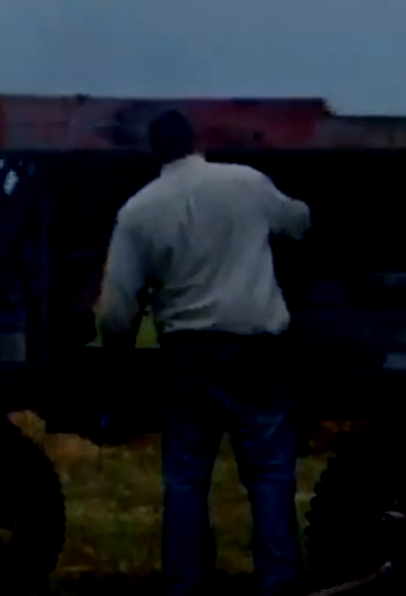

In [43]:
colorview(RGB, permutedims(((((dtst_single |> first)[1] |> Array) ./ 255) |> reduce_dim ), [3, 1, 2]))

In [38]:
deepercut_with_loc_ref_50(dtst_single)

0.04381022189748468

In [39]:
final, acc_dist_dict = modelized_PCKh_sigm(deepercut_with_loc_ref_50, dtst_single, test_data_items_single);

In [40]:
read_accuracy_results(acc_dist_dict)[31: 33, :] |> printstyled

[45.63 47.3 49.43 45.8 46.89 48.71 48.73 51.12 64.04 64.34 50.91 48.83 72.68 65.99; NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN; 45.63 47.3 49.43 45.8 46.89 48.71 48.73 51.12 64.04 64.34 50.91 48.83 72.68 65.99]

In [41]:
final

0.39408186535686585

In [26]:
demo_image_path = "./google-drive/image.png"
loaded_image = load(demo_image_path);
   macfix = convert(Array{FixedPointNumbers.Normed{UInt8,8},3}, channelview(loaded_image))
    demo_img = permutedims(macfix, (2, 3, 1));
demo_img |> size
demo_img = (demo_img |> Array )  .* 255
demo_img = (demo_img |> add_dim)  # .- (reshaped_mean_pixel .* 255)
# permuted_demo = permutedims(demo_img, [4, 1, 2, 3])
demo_pred = deepercut_with_loc_ref_50(Knet.atype()(demo_img));

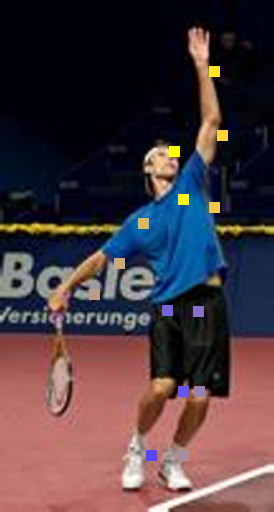

In [27]:
should_use_scmap_size = false
return_single_image = true
res = show_scmap_on_image(
   # ((demo_img  .+ (reshaped_mean_pixel .* 255)) |> reduce_dim) ./ 255 ,
    ((demo_img) |> reduce_dim) ./ 255 ,
    demo_pred;
    confidence_threshold=0.1,
    should_use_scmap_size= should_use_scmap_size,
    return_single_image= return_single_image,
    should_color_scmap=true,
    focus_on_argmax = false,
    add_loc_ref_offset = true,
    use_sigm = true
)
if return_single_image
    res |> display #imrotate(res, pi/2)
else    
for  r in res
  imrotate(r, π/2) |> display
end
end

In [30]:
#42.28 36.19 37.68 37.92 37.9 40.8 45.12 46.29 60.57 62.14 45.45 43.82 78.44 68.72
#39.81 33.28 39.62 40.11 34.76 38.68 45.44 43.05 62.63 60.45 47.39 44.62 85.33 67.73

0.5006981103594648

In [ ]:
#=
- [0.005, 10000]
- [0.02, 430000]
- [0.002, 730000]
- [0.001, 1030000]
=#

In [7]:
#=
We train networks with SGD for 1M iterations,
starting with the learning rate lr=0.001 for 10k,
then lr=0.002 for 420k,
lr=0.0002 for 300k and
lr=0.0001 for 300k. This corresponds to roughly 17 epochs of the MPII=#
deeper_cut_with_loc_ref_results = trainresults("29-12-20-continue",
    model,
    dtrn,
    dval, [(0.002, 8), (0.001, 12)]; 
    accuracy_func=nothing,
    error_func=nothing,
    secondary_accuracy_func=modelized_PCKh_sigm,
        data_items_trn=nothing,
        data_items_val=val_data_items
    );

┣██▍                 ┫ [12.50%, 25598/204800, 58:59/07:51:56, 7.30i/s] 

(0, 0.013955040275182904, 0.01395504027302751, 0, 0, 0, 0, 0, 0.5217468421854654)


┣████▊               ┫ [24.20%, 49556/204800, 02:24:00/09:55:08, 6.97i/s] ] Excessive output truncated after 524297 bytes.

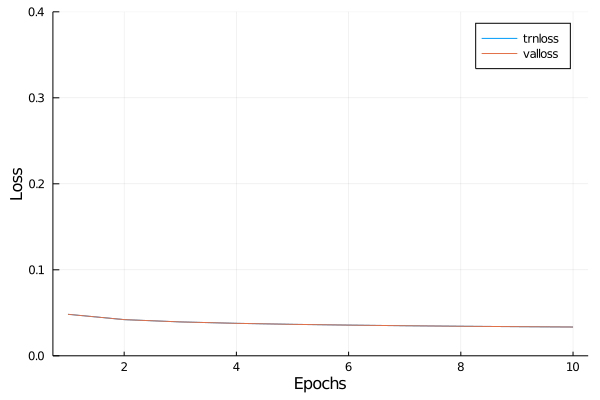

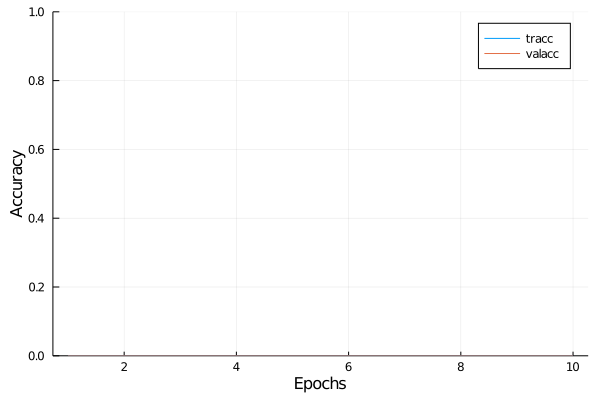

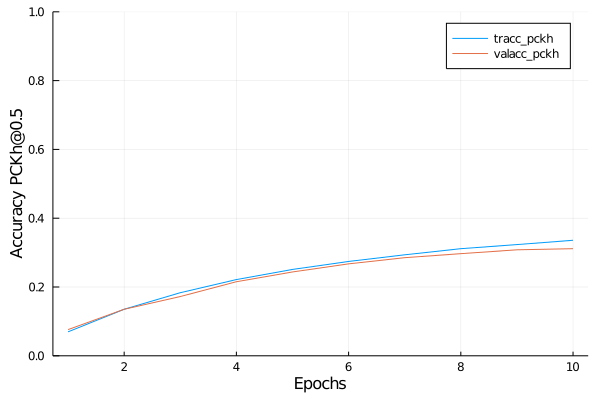

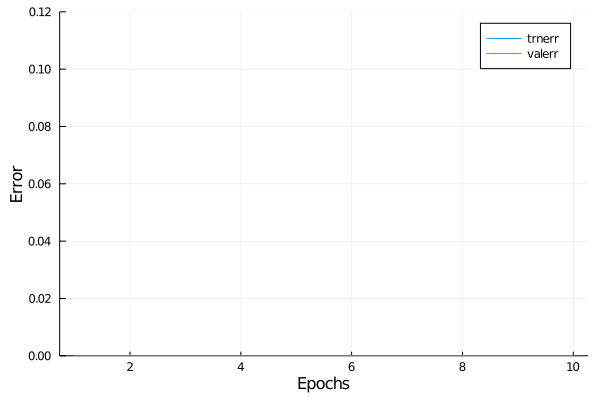

In [79]:
draw_plots(deeper_cut_with_loc_ref_results)

In [ ]:
# Experimental Zone

In [ ]:
sigmoided_output = Array(sigm.(resnet_with_deconv(dtrn_x1)));

In [ ]:
sigmoided_output = Array(sigm.(loadedResNet(dtrn_x1)));

In [ ]:
sigmoided_output[ sigmoided_output .< output_consider_threshold] .= 0  ;

In [ ]:
test_image_order = 7;

In [ ]:
gt_joint_images = draw_score_maps(Array(dtrn_y1), test_image_order);

In [ ]:
pred_joint_images = draw_score_maps(sigmoided_output, test_image_order);

In [ ]:
pred_joint_images[14]

In [ ]:
gt_joint_images[14]

In [ ]:
images = []
for (i, joint_sc) in enumerate(gt_joint_images)
img = show_scmap_on_image(test_image, joint_sc;
        fill_value=1, 
        should_use_scmap_size=true,
    display_name=i)
    push!(images, img)
end

In [ ]:
mosaicify(images; ncol=3)

In [ ]:
show_scmap_on_image(test_image, pred_joint_images[13]; fill_value=1);

In [ ]:
should_use_output_sized = false
test_image = Array(dtrn_x1_2k)[:, :, :, test_image_order];
output_sized_test_image = imresize(test_image, 32, 32);
perm = permutedims( should_use_output_sized ? output_sized_test_image : test_image, [3, 1, 2])
colored = colorview(RGB, perm);
fetch(display(colored));
#colorview(RGB, rand(3,256,256))

In [ ]:
#  Experimental Section

In [ ]:
first(dtrn)[1] |> size

In [ ]:
first(dtrn)[2] |> size

In [ ]:
#julia> w0 = KnetArray(randn(Float32, 5, 5, 1, 20));

#julia> x0 = KnetArray(rand(Float32, 24, 24, 20, 100));

#julia> size(deconv4(w0,x0)) # this output does not make it sense, it should give what I want
#(28, 28, 20, 100)
#

w0 = KnetArray(randn(Float32, 5, 5, 1, 20));
 x0 = KnetArray(rand(Float32, 4, 4, 2048, 32));

 # this output does not make it sense, it should give what I want
#(28, 28, 20, 100)

In [ ]:
dec_layer = Deconv(4, 4, 14, 2048; padding=1, stride=2, atype=Knet.atype())

In [ ]:
mock = randn(Float32, 16, 16, 2048, 32)
mock = convert(Knet.atype(), mock);

In [ ]:
size(dec_layer(mock))

In [ ]:
size(deconv4(w0, x0))

In [ ]:
tc = Conv2(3, 3, 3, 3)

In [ ]:
fb = first(dtrn)[1];

In [ ]:
res_tc = tc2(fb) |> tc;

In [ ]:
mid = res_tc |> tc2

In [ ]:
w1 = KnetArray(randn(Float32, 3, 3, 1, 3));

In [ ]:
#deconv4(w1, mid)
size(deconv4(w1, mid; padding=1))

In [ ]:
tc2 = ResLayerConv(3, 3, 3, 3; stride=2, padding=1)

In [ ]:
res_tc2 = res_tc |> tc2;

In [ ]:
size(res_tc)

In [ ]:
tc2(fb) |> tc2 |> tc2;